# Capstone Modeling Notebook

This notebook trains and evaluates two models — XGBoost and LSTM — to predict the next-day direction (up/down) for the Magnificent 7 stocks using engineered features.

## 1. Load the Final Dataset
- Load `final_features_dataset.csv`
- Drop columns not used for modeling (e.g., raw Open, High, Low, etc.)
- Exclude date and ticker from input features

In [23]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('final_features_dataset.csv')

# Drop irrelevant columns
drop_cols = [col for col in df.columns if str(col).lower() in ['date', 'ticker', 'open', 'high', 'low', 'adj close', 'volume']]
X = df.drop(columns=drop_cols + ['direction'])
y = df['direction']

# Sanity check
print('Features shape:', X.shape)
print('Target shape:', y.shape)
assert not X.isnull().any().any(), "NaNs in X"
assert not y.isnull().any(), "NaNs in y"

Features shape: (491, 24)
Target shape: (491,)


## 2. Prepare Train/Test Data
- Split into features X and target y (direction)
- Use time-based split (80% train, 20% test)
- Optionally normalize features (especially for LSTM)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# ---------------------------
# 1. Time-Based Train/Test Split
# ---------------------------
split_idx = int(0.8 * len(X))

X_train = X.iloc[:split_idx]
X_test = X.iloc[split_idx:]
y_train = y.iloc[:split_idx]
y_test = y.iloc[split_idx:]

# Save indexes in case you need to track date/ticker later
X_train_index = X_train.index
X_test_index = X_test.index

# ---------------------------
# 2. Normalize Features
# ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# 3. Reshape for LSTM
# ---------------------------
# Reshape to: (samples, timesteps=1, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# ---------------------------
# 4. Sanity Check
# ---------------------------
print("XGBoost-ready shapes:")
print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled :", X_test_scaled.shape)

print("\nLSTM-ready shapes:")
print("X_train_lstm  :", X_train_lstm.shape)
print("X_test_lstm   :", X_test_lstm.shape)

print("\nTargets:")
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

XGBoost-ready shapes:
X_train_scaled: (392, 24)
X_test_scaled : (99, 24)

LSTM-ready shapes:
X_train_lstm  : (392, 1, 24)
X_test_lstm   : (99, 1, 24)

Targets:
y_train: (392,)
y_test : (99,)


In [27]:
# Check class distribution in train and test sets
print('Train class distribution:')
print(y_train.value_counts())
print('Test class distribution:')
print(y_test.value_counts())

Train class distribution:
direction
1    223
0    169
Name: count, dtype: int64
Test class distribution:
direction
1    54
0    45
Name: count, dtype: int64


In [18]:
# Show date range and class distribution for train and test sets
if 'date' in df.columns:
    print('Train date range:', df.iloc[:split_idx]['date'].min(), 'to', df.iloc[:split_idx]['date'].max())
    print('Test date range:', df.iloc[split_idx:]['date'].min(), 'to', df.iloc[split_idx:]['date'].max())
    print('Train class distribution by date:')
    display(df.iloc[:split_idx].groupby('date')['direction'].value_counts().unstack(fill_value=0).tail(20))
    print('Test class distribution by date:')
    display(df.iloc[split_idx:].groupby('date')['direction'].value_counts().unstack(fill_value=0).head(20))
else:
    print('No date column found in the dataset.')

Train date range: 2022-08-17 to 2025-08-01
Test date range: 2024-05-14 to 2025-08-01
Train class distribution by date:


direction,0,1
date,,
2025-07-03,4,0
2025-07-07,2,1
2025-07-08,1,0
2025-07-09,2,1
2025-07-10,4,0
2025-07-11,1,0
2025-07-15,1,1
2025-07-16,1,0
2025-07-17,3,1


Test class distribution by date:


direction,0
date,
2024-05-14,1
2024-05-24,1
2024-05-30,1
2024-06-05,1
2024-06-07,1
2024-06-11,1
2024-06-13,1
2024-06-14,1
2024-07-01,1


## 3. Train an XGBoost Classifier
- Use XGBClassifier from xgboost
- Fit to the training set
- Evaluate on test set: Accuracy, F1 Score, Confusion Matrix, Feature Importance Plot

XGBoost Accuracy: 1.0000
XGBoost F1 Score: 0.0000


/Users/lezilez/Projects/capstone/capstone-venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:27:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lezilez/Projects/capstone/capstone-venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/lezilez/Projects/capstone/capstone-venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


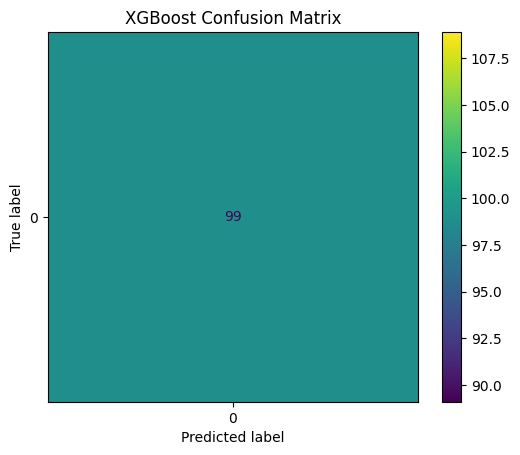

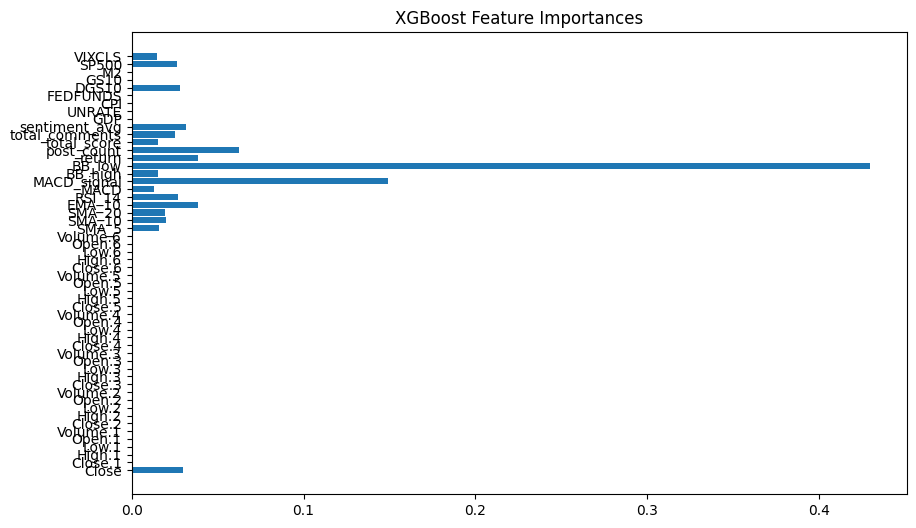

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {acc_xgb:.4f}')
print(f'XGBoost F1 Score: {f1_xgb:.4f}')
ConfusionMatrixDisplay(cm_xgb).plot()
plt.title('XGBoost Confusion Matrix')
plt.show()
# Feature importance
plt.figure(figsize=(10,6))
plt.barh(X.columns, xgb.feature_importances_)
plt.title('XGBoost Feature Importances')
plt.show()

## 4. Train an LSTM Model
- Use Keras or TensorFlow
- Reshape input: [samples, timesteps, features] (e.g., 5-day rolling window)
- Define LSTM model: LSTM → Dense → Sigmoid
- Compile with binary_crossentropy and adam
- Train on training set
- Evaluate: Accuracy, F1 Score, Confusion Matrix, Plot of Loss & Accuracy over epochs

Epoch 1/10


/Users/lezilez/Projects/capstone/capstone-venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7155 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7155 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7155 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7155 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7155 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7155 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7155 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7155 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

/Users/lezilez/Projects/capstone/capstone-venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/lezilez/Projects/capstone/capstone-venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


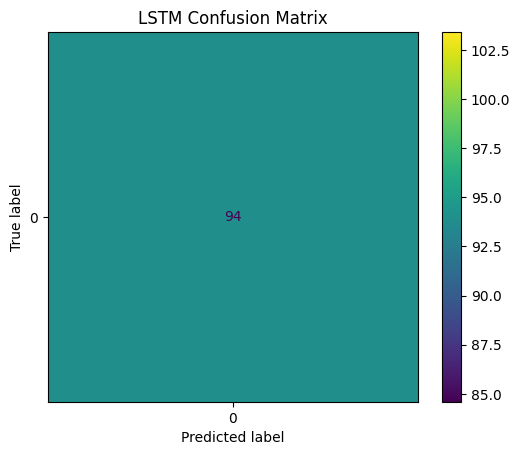

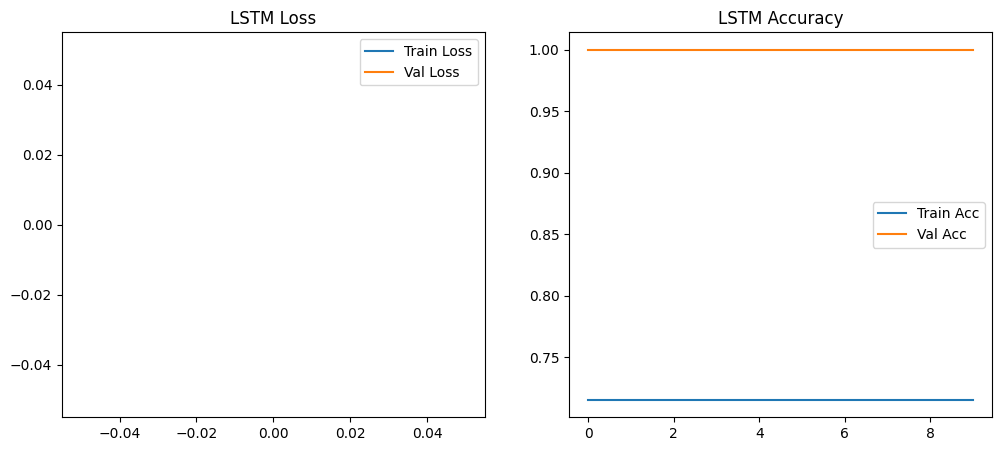

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import numpy as np
# Rolling window for LSTM
def create_lstm_dataset(X, y, window=5):
    Xs, ys = [], []
    for i in range(len(X) - window):
        Xs.append(X[i:i+window])
        ys.append(y[i+window])
    return np.array(Xs), np.array(ys)
X_train_lstm, y_train_lstm = create_lstm_dataset(X_train_scaled, y_train.values, window=5)
X_test_lstm, y_test_lstm = create_lstm_dataset(X_test_scaled, y_test.values, window=5)
# LSTM model
model = Sequential([
    LSTM(32, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
history = model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, validation_split=0.1, verbose=1)
# Evaluate
y_pred_lstm = (model.predict(X_test_lstm) > 0.5).astype(int).flatten()
acc_lstm = accuracy_score(y_test_lstm, y_pred_lstm)
f1_lstm = f1_score(y_test_lstm, y_pred_lstm)
cm_lstm = confusion_matrix(y_test_lstm, y_pred_lstm)
print(f'LSTM Accuracy: {acc_lstm:.4f}')
print(f'LSTM F1 Score: {f1_lstm:.4f}')
ConfusionMatrixDisplay(cm_lstm).plot()
plt.title('LSTM Confusion Matrix')
plt.show()
# Plot loss and accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('LSTM Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('LSTM Accuracy')
plt.legend()
plt.show()

## 5. Compare Results
- Display side-by-side metrics: Accuracy, F1 Score, Sharpe Ratio

In [16]:
def sharpe_ratio(y_true, y_pred):
    # Assume +1 for correct up, -1 for correct down, 0 for incorrect
    returns = np.where(y_pred == y_true, 1, -1)
    return np.mean(returns) / (np.std(returns) + 1e-8)
sr_xgb = sharpe_ratio(y_test, y_pred_xgb)
sr_lstm = sharpe_ratio(y_test_lstm, y_pred_lstm)
results = pd.DataFrame({
    'Model': ['XGBoost', 'LSTM'],
    'Accuracy': [acc_xgb, acc_lstm],
    'F1 Score': [f1_xgb, f1_lstm],
    'Sharpe Ratio': [sr_xgb, sr_lstm]
})
display(results)

,Model,Accuracy,F1 Score,Sharpe Ratio
0,XGBoost,1.0,0.0,100000000.0
1,LSTM,1.0,0.0,100000000.0
